In [1]:
import networkx as nx
import matplotlib.font_manager

#
# Getting Japanese fonts to work with Networkx can bit a little tricky.
#
# https://qiita.com/grachro/items/4c9b03366cae2df3a301
# https://linuxfan.info/ubuntu-18-04-change-ja-font
# https://showa-yojyo.github.io/notebook/python-networkx/drawing.html 
#
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
jp_fonts = [f for f in fonts if 'takao' in f.lower()]
print(jp_fonts)
jp_prop = matplotlib.font_manager.FontProperties(fname=jp_fonts[0])
jp_prop.set_size(40)

['/usr/share/fonts/truetype/takao-mincho/TakaoMincho.ttf', '/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf', '/usr/share/fonts/truetype/takao-mincho/TakaoPMincho.ttf', '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf']


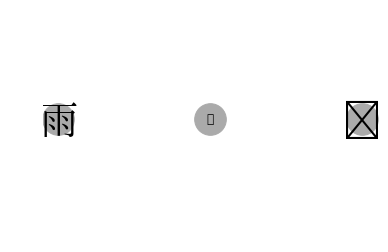

In [2]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot
%matplotlib inline

fix, ax = plt.subplots()
graph = nx.Graph()
graph.add_node('rain', label='雨')
graph.add_node('badfont', label='風')
graph.add_node('broken', label='⿱')

positions = graphviz_layout(graph, 'dot')
nx.draw(graph, pos=positions, with_labels=False, font_weight='bold',
        node_color='#aaaaaa', node_size=1000, edge_color='#999999')
labels = {key: value.get('label', '') for (key, value) in graph.nodes().items()}
label_positions = nx.draw_networkx_labels(graph, positions, labels=labels)

for node, text in label_positions.items():
    if node != 'badfont':
        text.set_fontproperties(jp_prop)

plt.show()

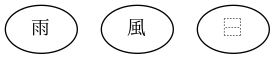

In [3]:
import IPython.display
write_dot(graph, 'graph.dot')
!dot -Tpng < graph.dot > graph.png
IPython.display.Image('graph.png')